In [258]:
#Import Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
import re
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import itertools
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.metrics import hamming_loss
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Received an error message so I looked up the error and found that I needed to [change the encodings](https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas)

In [188]:
#Import Data
df = pd.read_csv('https://raw.githubusercontent.com/josh-g-grimes/Twitter-Sentiment-NLP/main/data.csv', encoding='latin-1')

In [189]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [190]:
df = df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "tweet_sentiment"})

In [191]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,tweet_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


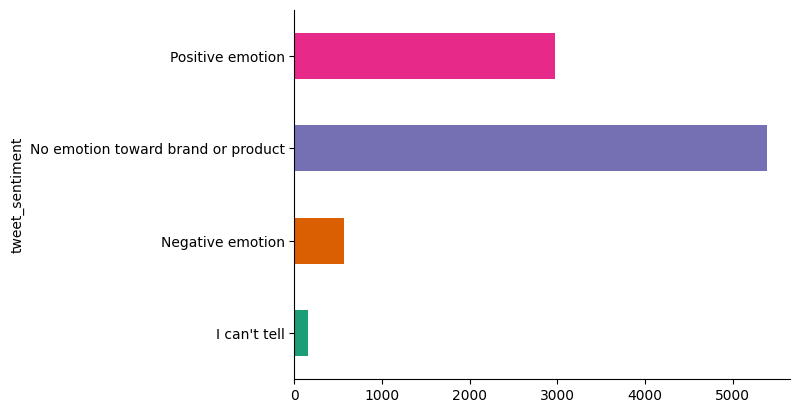

In [192]:
#Look at the distribution of emotions that are directed at brands or products
df.groupby('tweet_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [193]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)

In [194]:
for emotion in df['tweet_sentiment'].unique():
    df[emotion] = df['tweet_sentiment'].apply(lambda x: 1 if x == emotion else 0)

In [195]:
df.head()

,tweet_text,tweet_sentiment,Negative emotion,Positive emotion,No emotion toward brand or product,I can't tell
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,1,0,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,0,1,0,0
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,0,1,0,0
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,1,0,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,0,1,0,0


In [196]:
df.drop(columns=['tweet_sentiment'], inplace=True)

In [197]:
df.head()

,tweet_text,Negative emotion,Positive emotion,No emotion toward brand or product,I can't tell
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,0,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0,1,0,0
2,@swonderlin Can not wait for #iPad 2 also. The...,0,1,0,0
3,@sxsw I hope this year's festival isn't as cra...,1,0,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0,1,0,0


In [198]:
df = df.rename(columns={"No emotion toward brand or product": "No emotion"})

In [199]:
df.head()

,tweet_text,Negative emotion,Positive emotion,No emotion,I can't tell
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,0,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0,1,0,0
2,@swonderlin Can not wait for #iPad 2 also. The...,0,1,0,0
3,@sxsw I hope this year's festival isn't as cra...,1,0,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0,1,0,0


In [200]:
#Initializing empty directory to store dataframes for each type of emotion
emotion_df = {}

for emotion in df.columns[1:]:
  #Creates a key and value of only that emotion
    emotion_df[emotion] = df[df[emotion] == 1]['tweet_text']

In [201]:
# Convert all elements of the series to strings and replace NaN with empty strings
No_emotion_text = " ".join(str(x) for x in emotion_df['No emotion'].fillna(''))
Negative_emotion_text = " ".join(str(x) for x in emotion_df['Negative emotion'].fillna(''))
Positive_emotion_text = " ".join(str(x) for x in emotion_df['Positive emotion'].fillna(''))
Cant_tell_emotion_text = " ".join(str(x) for x in emotion_df['I can\'t tell'].fillna(''))

In [202]:
print('No Emotion Length: ', len(No_emotion_text))
print('Negative Emotion Length: ', len(Negative_emotion_text))
print('Positive Emotion Length: ', len(Positive_emotion_text))
print('Cant Tell Emotion Length: ', len(Cant_tell_emotion_text))

No Emotion Length:  566745
Negative Emotion Length:  62954
Positive Emotion Length:  317331
Cant Tell Emotion Length:  16376


In [203]:
print(No_emotion_text[:500])

@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd  Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link} Anyone at  #sxsw want to sell their old iPad? Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me? At #sxsw.  Oooh. RT @mention Google to La


Text(0.5, 1.0, 'No Emotion')

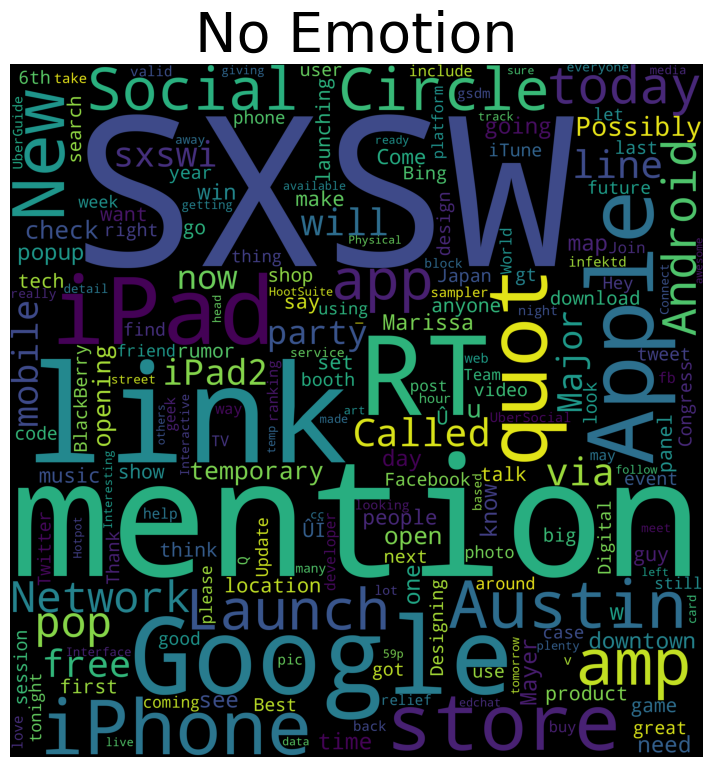

In [204]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(No_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title('No Emotion', fontsize=40)

In [205]:
#Removes special characters, and numbers
def the_cleaner(text):

   text_replace = text.replace('\\r', ' ').replace('\\n', ' ').replace('\\', '').split()
   text_strip = [re.sub(r"\([^()]*\)", "", i) for i in text_replace]
   cleaned_text = " ".join([x for x in text_strip if x.isalpha() and len(x) > 1])

   return cleaned_text

In [206]:
No_emotion_text = the_cleaner(No_emotion_text)
Negative_emotion_text = the_cleaner(Negative_emotion_text)
Positive_emotion_text = the_cleaner(Positive_emotion_text)
Cant_tell_emotion_text = the_cleaner(Cant_tell_emotion_text)

In [207]:
def lem_process_doc(text):

    text = text.lower() #lowercase all the text

    stop_words = stopwords.words('english') #import stop word list
    twitter_stop_words = ['RT', 'twitter']
    stop_words_modified = list(itertools.chain(twitter_stop_words, stop_words)) #combining stop words and twitter stop words

    wnl = WordNetLemmatizer() ###Lemmatize words
    doc_norm = [tok for tok in word_tokenize(text) if ((tok.isalpha()) & (tok not in stop_words_modified))] ###Tokenize Words

    return " ".join([wnl.lemmatize(tok) for tok in doc_norm])

In [208]:
No_emotion_text = lem_process_doc(No_emotion_text)
Negative_emotion_text = lem_process_doc(Negative_emotion_text)
Positive_emotion_text = lem_process_doc(Positive_emotion_text)
Cant_tell_emotion_text = lem_process_doc(Cant_tell_emotion_text)

Text(0.5, 1.0, 'No Emotion')

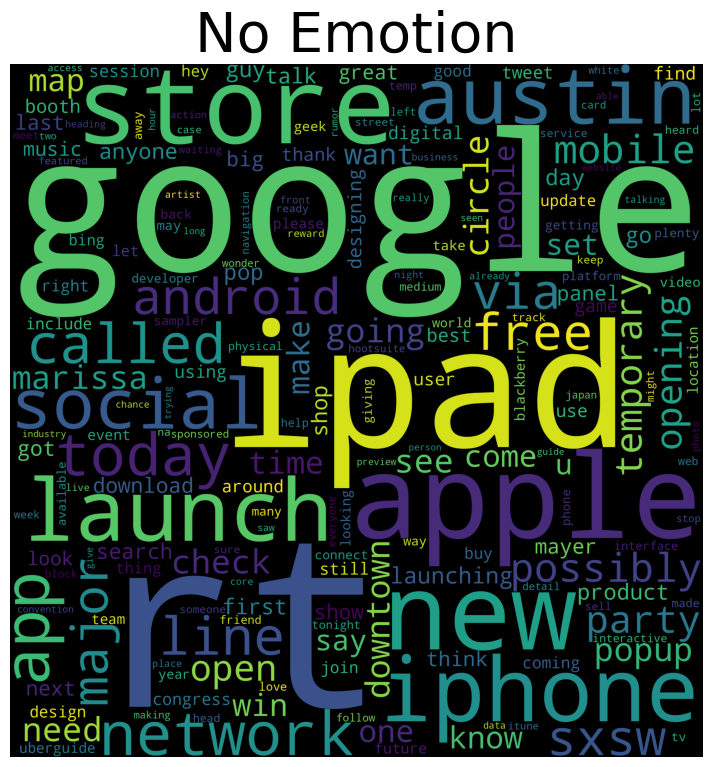

In [209]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(No_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title('No Emotion', fontsize=40)

In [210]:
#initialize dict to store text values
emotion_word_counts = {}

#looping through all target classes
for emotion in df.columns[1:]:

  #saving preprocess text to a variable
  emotion_preprocessed_text = " ".join(str(text) for text in df[df[emotion] == 1]['tweet_text'])

  #creating a freq dict
  emotion_freq_dict = FreqDist(emotion_preprocessed_text.split())

  #storing emotion's freqdict in intial dictoniary for quick access
  emotion_word_counts[emotion] = emotion_freq_dict

In [211]:
#find the most frequent words
def getting_stops(freq_dist, top_n):
  words = []
  for word, frequency in freq_dist.most_common(top_n):
    words.append(word)
  return words

In [212]:
#Create a list of the top 100 most frequent words shared by each of the emotion sentiments
word_list = []
for emotion in emotion_word_counts.keys():
  word_list.append(getting_stops(emotion_word_counts[emotion], 1000))

stops = list(set.intersection(*map(set, word_list)))

In [213]:
def lem_process_doc(text):

    text = text.lower() #lowercase all the text

    stop_words = stopwords.words('english') #import stop word list
    twitter_stop_words = ['rt', 'twitter', 'mention', 'quot', 'sxsw', 'sxswi']
    stop_words_modified = list(itertools.chain(twitter_stop_words, stop_words)) #combining stop words and twitter stop words

    wnl = WordNetLemmatizer() ###Lemmatize words
    doc_norm = [tok for tok in word_tokenize(text) if ((tok.isalpha()) & (tok not in stop_words_modified))] ###Tokenize Words

    return " ".join([wnl.lemmatize(tok) for tok in doc_norm])

In [214]:
No_emotion_text = lem_process_doc(No_emotion_text)
Negative_emotion_text = lem_process_doc(Negative_emotion_text)
Positive_emotion_text = lem_process_doc(Positive_emotion_text)
Cant_tell_emotion_text = lem_process_doc(Cant_tell_emotion_text)

Text(0.5, 1.0, 'No Emotion')

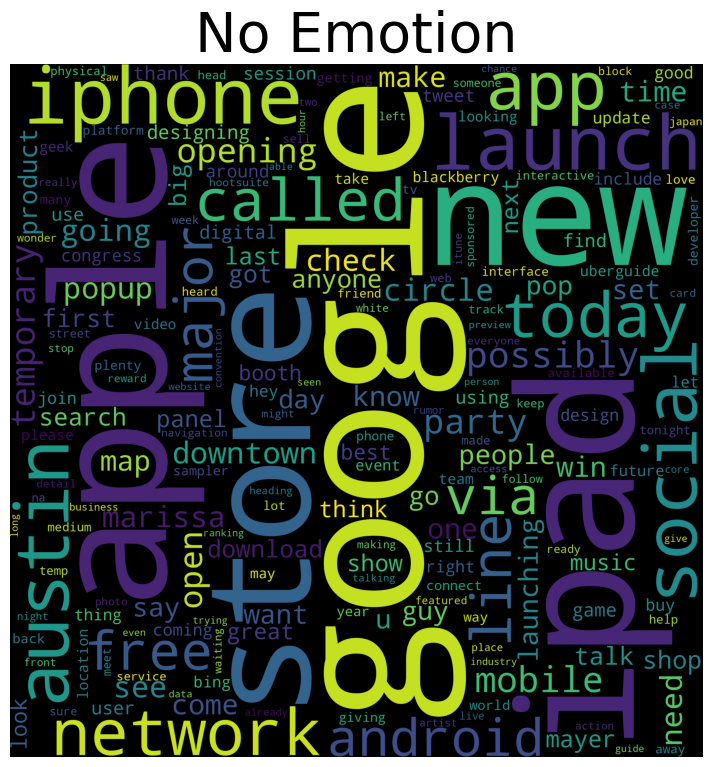

In [215]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(No_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title('No Emotion', fontsize=40)

Text(0.5, 1.0, 'Positive Emotion')

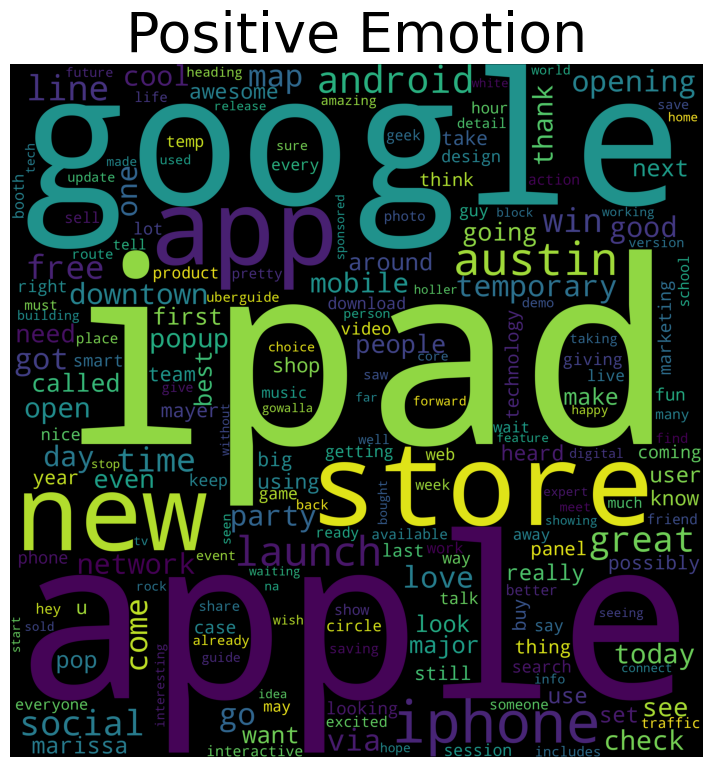

In [216]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(Positive_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title('Positive Emotion', fontsize=40)

Text(0.5, 1.0, 'Negative Emotion')

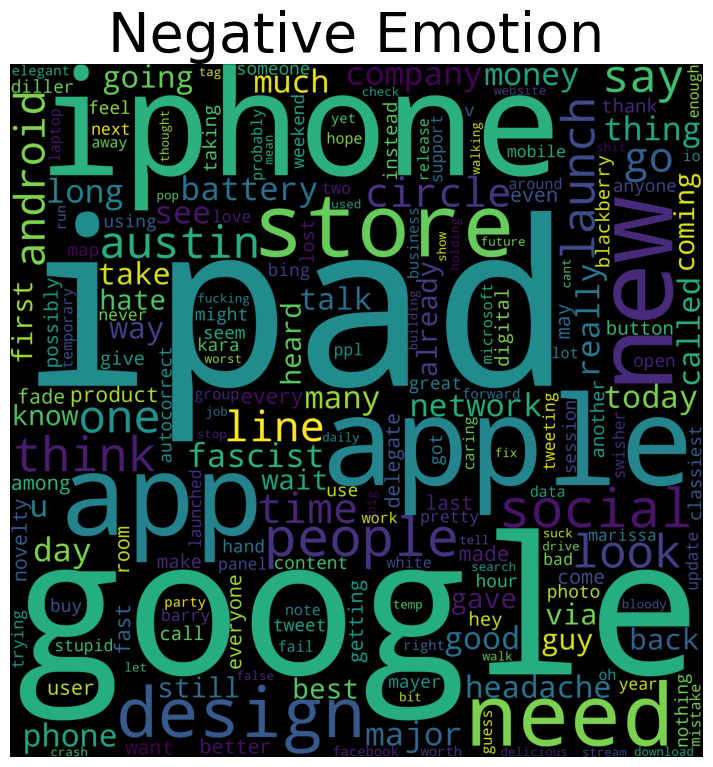

In [217]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(Negative_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title('Negative Emotion', fontsize=40)

Text(0.5, 1.0, "Can't Tell")

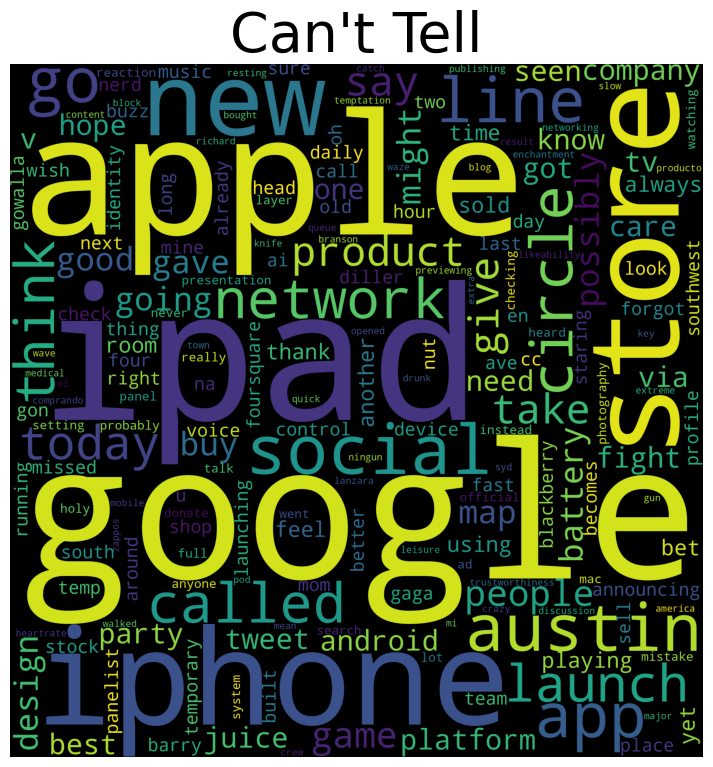

In [218]:
#Creates a Word Cloud for the most common words in tweets with No Emotion towards a product
plt.figure(figsize=(10, 9))
cloud = WordCloud(background_color='black', collocations=False, width=2500, height=2500).generate(Cant_tell_emotion_text)
plt.imshow(cloud)
plt.axis('off')
plt.title("Can't Tell", fontsize=40)

In [219]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [220]:
df_train

,tweet_text,Negative emotion,Positive emotion,No emotion,I can't tell
7678,For any friends coming to Austin for SXSW: {li...,0,0,1,0
4019,Survival kit provided to folks in line at the ...,0,1,0,0
3772,RT ÛÏ@mention Google to Launch Major New Soci...,0,0,1,0
7465,Attended preso on living simply #100tc at #sxs...,1,0,0,0
8220,"deviantART buys 3 iPad 2's in Austin, tests Mu...",0,1,0,0
...,...,...,...,...,...
5734,RT @mention For many of you that asked last ni...,0,0,1,0
5191,RT @mention &quot;So if you Google &quot;refri...,0,1,0,0
5390,RT @mention Android developers and friends: le...,0,1,0,0
860,So geeky! Love it! RT @mention Apple is openin...,0,1,0,0


In [221]:
# Check for float values in 'tweet_text' column of both DataFrames
print(df_train['tweet_text'].apply(type).value_counts())
print(df_test['tweet_text'].apply(type).value_counts())

# Convert any float values to string before applying the_cleaner function
df_train['tweet_text'] = df_train['tweet_text'].astype(str)
df_test['tweet_text'] = df_test['tweet_text'].astype(str)

df_train['txt'] = df_train.tweet_text.apply(lambda x: the_cleaner(x))
df_test['txt'] = df_test.tweet_text.apply(lambda x: the_cleaner(x))

tweet_text
<class 'str'>      7273
<class 'float'>       1
Name: count, dtype: int64
tweet_text
<class 'str'>    1819
Name: count, dtype: int64


In [222]:
df_train['txt'] = df_train.tweet_text.apply(lambda x: lem_process_doc(x))
df_test['txt'] = df_test.tweet_text.apply(lambda x: lem_process_doc(x))

In [225]:
df_train

,tweet_text,Negative emotion,Positive emotion,No emotion,I can't tell,txt
7678,For any friends coming to Austin for SXSW: {li...,0,0,1,0,friend coming austin link austin
4019,Survival kit provided to folks in line at the ...,0,1,0,0,survival kit provided folk line apple store mo...
3772,RT ÛÏ@mention Google to Launch Major New Soci...,0,0,1,0,google launch major new social network called ...
7465,Attended preso on living simply #100tc at #sxs...,1,0,0,0,attended preso living simply felt bit guilty t...
8220,"deviantART buys 3 iPad 2's in Austin, tests Mu...",0,1,0,0,deviantart buy ipad austin test muro drawing s...
...,...,...,...,...,...,...
5734,RT @mention For many of you that asked last ni...,0,0,1,0,many asked last night free android phone sign ...
5191,RT @mention &quot;So if you Google &quot;refri...,0,1,0,0,google refrigerator magnet game everyone keyno...
5390,RT @mention Android developers and friends: le...,0,1,0,0,android developer friend let hang saturday lin...
860,So geeky! Love it! RT @mention Apple is openin...,0,1,0,0,geeky love apple opening temporary store downt...


In [226]:
#Split training data by target class into individual dataframes
emotion_dfs = {}

for emotion in df.columns[1:]:
  emotion_dfs[emotion] = df_train[df_train[emotion] == 1]

In [232]:
#Extract text from each dictionary value and creat frequency distribution objects as word counts
emotion_freq_dist = {}

for emotion in emotion_dfs.keys():
  all_emotion_text = " ".join(emotion_dfs[emotion].txt)
  emotion_freq_dist[emotion] = FreqDist(all_emotion_text.split())

In [235]:
#Loop through each FreqDist for each emotion, extract the top 500 words, add them to a list and find the intersection
top_words = []

for emotion in emotion_freq_dist.keys():
  emotion_words = emotion_freq_dist[emotion].most_common(500)
  top_words.append(set([word for word, _ in emotion_words]))

stop_words = list(set.intersection(*top_words))


In [236]:
#Eliminate words in the training and test data that are on the stop word list
def stopping(text, stops):
  text_split = text.split()
  updated_text = [word for word in text_split if word not in stops]

  return " ".join(updated_text)

X_train = df_train.txt.apply(lambda x: stopping(x, stop_words))
X_test = df_test.txt.apply(lambda x: stopping(x, stop_words))

In [237]:
y_train = df_train.loc[:, emotion_freq_dist.keys() ]
y_test = df_test.loc[:, emotion_freq_dist.keys() ]

In [251]:
#Takes in a fitted model, dictionary, and description of the model and returns an updated dictionary that will be used to evaluate model results
models_dct = {'model': [], 'hamming_loss': [], 'model_type': []}

def model_update(model, dct, model_type):
  #The to_frame() method was missing the name parameter. Adding it in should fix the issue.
  #The code was previously only predicting on the first row of X_test. Updated to predict on the entire dataframe.
  y_pred = model.predict(X_test)
  ham_loss = hamming_loss(y_test, y_pred)
  models_dct['model'].append(model)
  models_dct['hamming_loss'].append(ham_loss)
  models_dct['model_type'].append(model_type)

  print(f'{model_type}: {ham_loss}')

In [252]:
pipe_OVRC_lg = Pipeline([('tfidf', TfidfVectorizer()),('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))])
pipe_OVRC_lg.fit(X_train, y_train)
model_update(pipe_OVRC_lg, models_dct, 'Logistic Regression')

pipe_OVRC_rf = Pipeline([('tfidf', TfidfVectorizer()),('clf', OneVsRestClassifier(RandomForestClassifier()))])
pipe_OVRC_rf.fit(X_train, y_train)
model_update(pipe_OVRC_rf, models_dct, 'Random Forest')

pipe_OVRC_svc = Pipeline([('tfidf', TfidfVectorizer()),('clf', OneVsRestClassifier(LinearSVC()))])
pipe_OVRC_svc.fit(X_train, y_train)
model_update(pipe_OVRC_svc, models_dct, 'Linear SVC')

Logistic Regression: 0.1720725673446949
Random Forest: 0.17124793842770752
Linear SVC: 0.1737218251786696


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [253]:
pipe_OVRC_lg_2 = Pipeline([('cv', CountVectorizer()),('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))])
pipe_OVRC_lg_2.fit(X_train, y_train)
model_update(pipe_OVRC_lg_2, models_dct, 'Logistic Regression 2')

pipe_OVRC_rf_2 = Pipeline([('cv', CountVectorizer()),('clf', OneVsRestClassifier(RandomForestClassifier()))])
pipe_OVRC_rf_2.fit(X_train, y_train)
model_update(pipe_OVRC_rf_2, models_dct, 'Random Forest 2')

pipe_OVRC_svc_2 = Pipeline([('cv', CountVectorizer()),('clf', OneVsRestClassifier(LinearSVC()))])
pipe_OVRC_svc_2.fit(X_train, y_train)
model_update(pipe_OVRC_svc_2, models_dct, 'Linear SVC 2')

Logistic Regression 2: 0.16918636613523913
Random Forest 2: 0.1722100054975261


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC 2: 0.17715777899945026


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [254]:
pipe_CC_lg = Pipeline([('tfidf', TfidfVectorizer()),('clf', ClassifierChain(LogisticRegression(solver='liblinear')))])
pipe_CC_lg.fit(X_train, y_train)
model_update(pipe_CC_lg, models_dct, 'Logistic Regression Chain')

pipe_CC_rf = Pipeline([('tfidf', TfidfVectorizer()),('clf', ClassifierChain(RandomForestClassifier()))])
pipe_CC_rf.fit(X_train, y_train)
model_update(pipe_CC_rf, models_dct, 'Random Forest Chain')

pipe_CC_svc = Pipeline([('tfidf', TfidfVectorizer()),('clf', ClassifierChain(LinearSVC()))])
pipe_CC_svc.fit(X_train, y_train)
model_update(pipe_CC_svc, models_dct, 'Linear SVC Chain')

Logistic Regression Chain: 0.17509620670698187
Random Forest Chain: 0.17179769103903245
Linear SVC Chain: 0.16904892798240792


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [255]:
pipe_CC_lg_2 = Pipeline([('cv', CountVectorizer()),('clf', ClassifierChain(LogisticRegression(solver='liblinear')))])
pipe_CC_lg_2.fit(X_train, y_train)
model_update(pipe_CC_lg_2, models_dct, 'Logistic Regression Chain 2')

pipe_CC_rf_2 = Pipeline([('cv', CountVectorizer()),('clf', ClassifierChain(RandomForestClassifier()))])
pipe_CC_rf_2.fit(X_train, y_train)
model_update(pipe_CC_rf_2, models_dct, 'Random Forest Chain 2')

pipe_CC_svc_2 = Pipeline([('cv', CountVectorizer()),('clf', ClassifierChain(LinearSVC()))])
pipe_CC_svc_2.fit(X_train, y_train)
model_update(pipe_CC_svc_2, models_dct, 'Linear SVC Chain 2')

Logistic Regression Chain 2: 0.17289719626168223
Random Forest Chain 2: 0.1722100054975261


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Chain 2: 0.1741341396371633


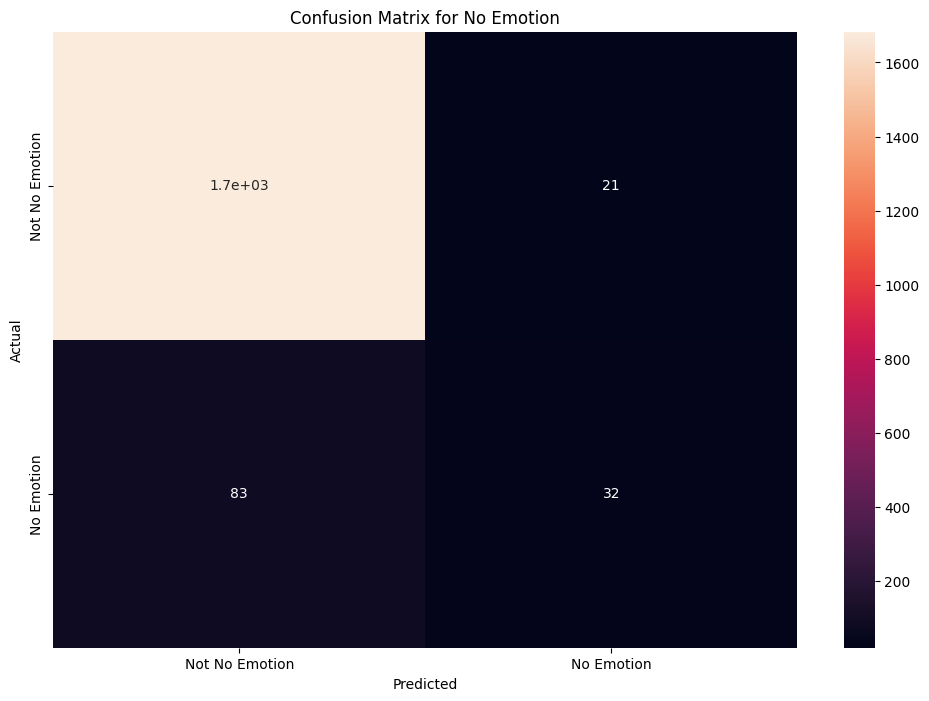

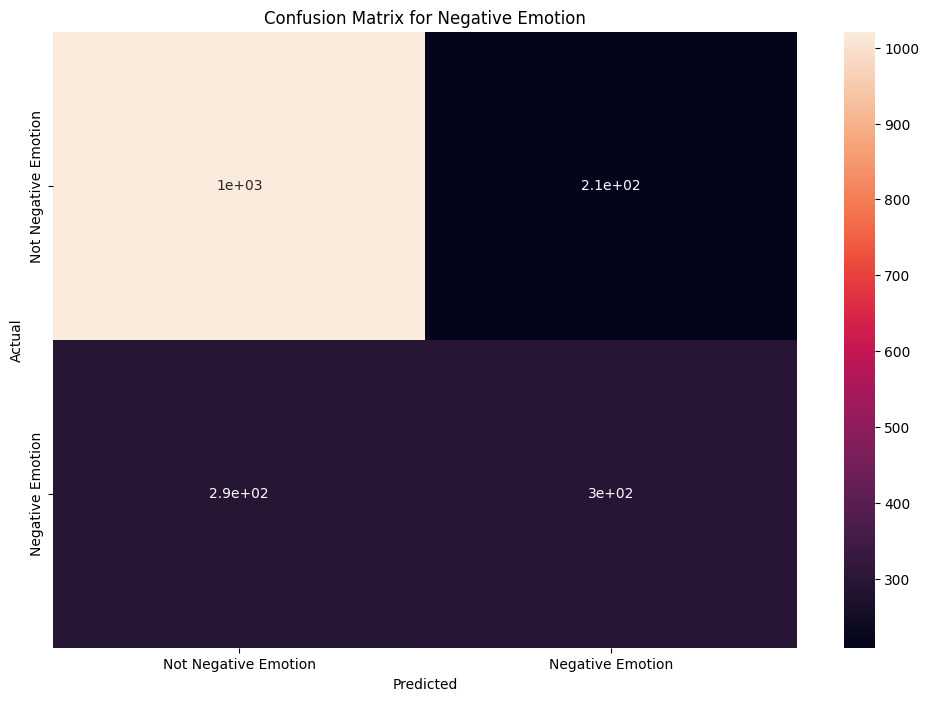

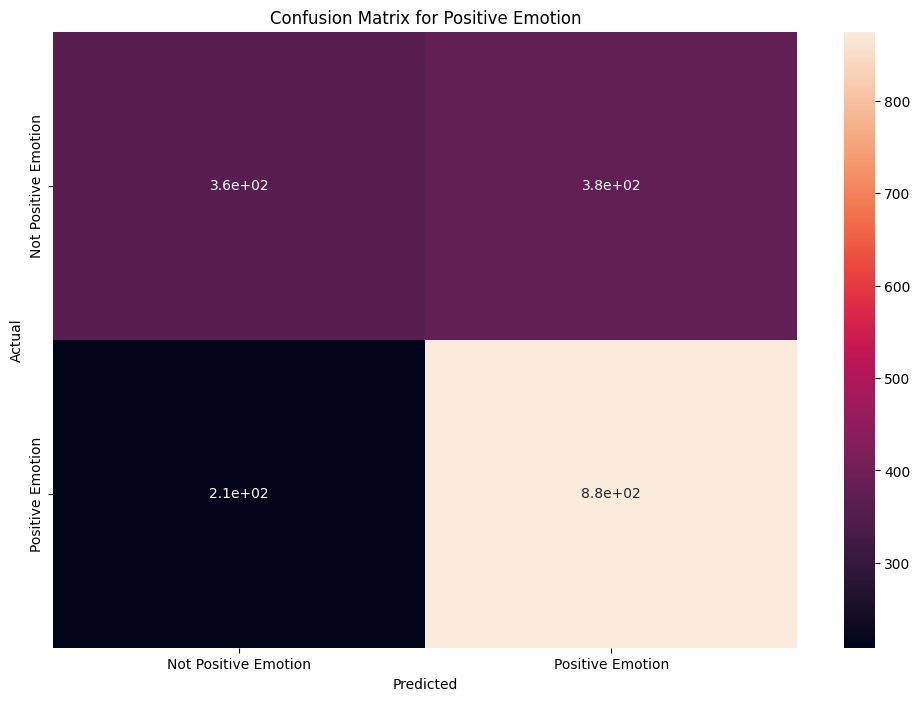

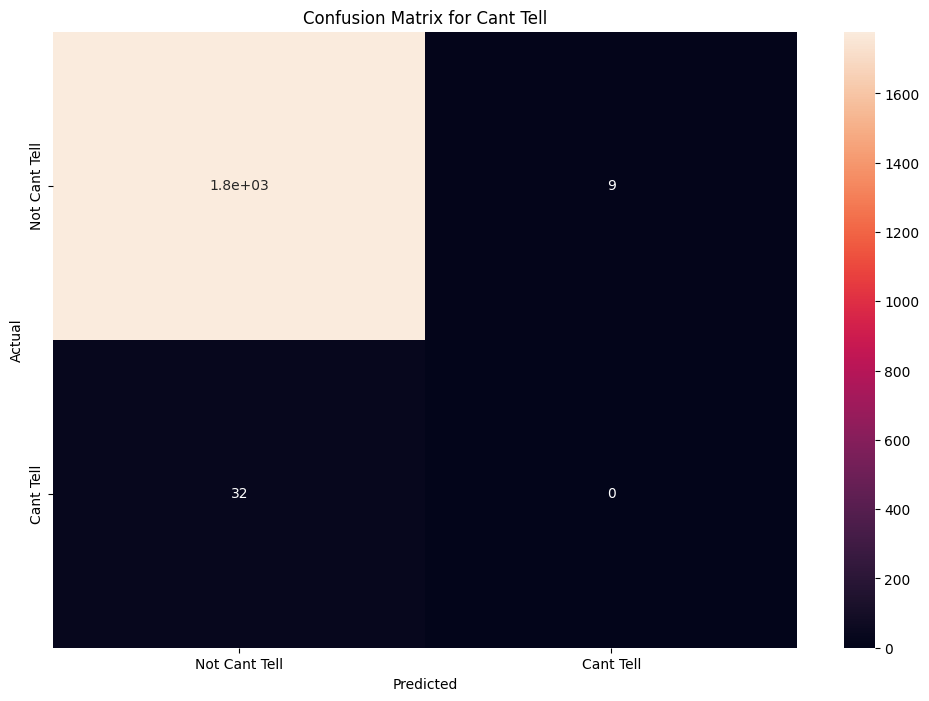

In [263]:
cm = multilabel_confusion_matrix(y_test, pipe_CC_svc.predict(X_test))

labels = ['No Emotion', 'Negative Emotion', 'Positive Emotion', 'Cant Tell']

for i, label in enumerate(labels):
    cm_df = pd.DataFrame(cm[i], index=[f'Not {label}', label], columns=[f'Not {label}', label])

    plt.figure(figsize=(12, 8))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix for {label}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()